EXAMEN UNIDAD 2

ELABORADO POR:

ELISEO ADRIAN CARDENAS ORTIZ 19020081

YOLANDA CHAVEZ GUTIERREZ 19020083

In [60]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score

In [64]:
data = pd.read_csv("DataSet1.csv")
data.head()

/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/173771504.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("DataSet1.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.isnull()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
864859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [5]:
data["T_degC"].isnull().sum()

10963

In [6]:
data["T_degC"] = data["T_degC"].fillna(data["T_degC"].mean())

In [7]:
X = data[["Depthm"]]
y = data[["T_degC"]]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,random_state=45)

MODELO DE REGRESION BASE

In [9]:
from sklearn import linear_model
reg_lin = linear_model.LinearRegression()

In [10]:
reg_lin.fit(X_train,y_train) 

LinearRegression()

In [11]:
y_pred= reg_lin.predict(X_test)

In [12]:
reg_lin.score(X_test,y_test)

0.46127735410546666

BREVE DESCRIPCION DEL ALGORITMO

El modelo de regresion linear es un algoritmo relativamente simple que busca crear un grafico entre 2 variables y asi predecir que direccion tomara el grafico basandose en datos que ya se le proporcionaron, suponemos que este modelo nos servira para este ejemplo porque los datos se pueden graficar de esa forma

VALIDACION CRUZADA

In [13]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [14]:
#lo primero que tenemos que hacer es crear nuestra malla de datos

grid = {
    'fit_intercept' : [True,False],
    'copy_X' : [True,False],
    'n_jobs' : [1,2],
    'positive' : [True,False]
}



In [15]:
data_cv = GridSearchCV(estimator=linear_model.LinearRegression(),param_grid=grid,cv=5)
data_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 2],
                         'positive': [True, False]})

INFORME DE LOS MEJORES HIPERPARAMETROS QUE SE ENCONTRARON

In [16]:
data_cv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

EXPLICACION VALIDACION CRUZADA

Utilizar la validacion cruzada es importante porque nos permite encontrar los mejores parametros para entrenar nuestros modelos

AJUSTE DE HIPERPARAMETROS

In [17]:
reg_lin2 = linear_model.LinearRegression(
                                         fit_intercept= True,
                                         copy_X= True, 
                                         n_jobs= 1,
                                         positive=False).fit(X_train,np.ravel(y_train))



EXPLICACION DE LOS HIPERPARAMETROS


fit_intercept:
Este parámetro determina si se ajustara una constante al modelo, si se establece en true la constante se ajustara pero si es false se asume que la línea de regresión pasa por el origen.


copy_X: 
Este parámetro determina si se debe crear una copia de los datos de entrada antes de ajustar el modelo. Si se establece en true se creara una copia pero si es false se utilizara la matriz original de datos.


n_jobs:
Este parámetro determina la cantidad de trabajos en paralelo que se utilizaran durante el ajuste del modelo. Si se establece en 1 se utilizaran tanto trabajos como se especifiquen, si es -1 se utilizaran todos los núcleos de la CPU disponibles.


positive:
Este parámetro se utiliza para imponer restricciones de positividad en los coeficientes de la regresión. Si se establece en true se impondrán estas restricciones pero si es false no se impondrán restricciones de este tipo.

COMPARACION DE RENDIMIENTO ENTRE MODELO BASE Y AJUSTADO

In [18]:
y_pred= reg_lin2.predict(X_test)
reg_lin2.score(X_test,y_pred)

1.0

En el segundo modelo con los hiperparametros modificados vemos que el score aumenta significativamente aumenta al 100% sin embargo esto aunque parezca bueno , no lo es, nuestro score debe tener un pequeño margen de fallo porque si es de 100% simplemente se aprendio los datos y va a fallar, por lo que nuestro score con hiperparametros sin modfiicar resulta mas exitoso




MODELO DE CLASIFICACION




In [19]:
data = pd.read_csv('data.csv')

In [47]:
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [21]:
data.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [22]:
data.dtypes

Age             int64
Duration        int64
Frequency       int64
Location        int64
Character       int64
Intensity       int64
Nausea          int64
Vomit           int64
Phonophobia     int64
Photophobia     int64
Visual          int64
Sensory         int64
Dysphasia       int64
Dysarthria      int64
Vertigo         int64
Tinnitus        int64
Hypoacusis      int64
Diplopia        int64
Defect          int64
Ataxia          int64
Conscience      int64
Paresthesia     int64
DPF             int64
Type           object
dtype: object

In [45]:
data["Type"].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [46]:
data["Type"]

0      Typical aura with migraine
1      Typical aura with migraine
2      Typical aura with migraine
3      Typical aura with migraine
4      Typical aura with migraine
                  ...            
395             Basilar-type aura
396             Basilar-type aura
397             Basilar-type aura
398             Basilar-type aura
399             Basilar-type aura
Name: Type, Length: 400, dtype: object

In [48]:
X = data[["Photophobia"]]
y = data[["Type"]]

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,random_state=45)

In [65]:
from sklearn.ensemble import RandomForestClassifier


MODELO DE CLASIFICACION BASE CON EL ALGORITMO RANDOMFOREST

In [66]:
#crear instancia
rfc = RandomForestClassifier()
#entrenamiento
rfc.fit(X_train, y_train)
#predict
y_pred= rfc.predict(X_test)


/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/4159439742.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [69]:
rfc.score(X_test,y_test)

0.65

/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Bosque aleatorio con párametros por default 
 Promedio y desviación estándar: 65.0% (0.0)


/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)


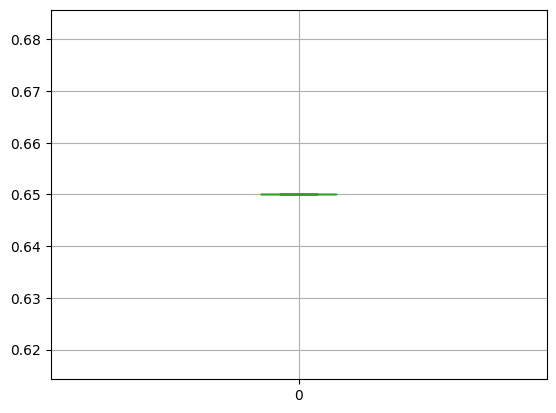

In [70]:
n_for = 10
accAD = list()

for k in range(n_for):
    
    modelo_AD = RandomForestClassifier()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD.append(tmp)

print('Bosque aleatorio con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3779132405.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3779132405.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3779132405.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_740/3779132405.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Bosque aleatorio con hiperpárametros modificados
 Promedio y desviación estándar: 65.0% (0.0)


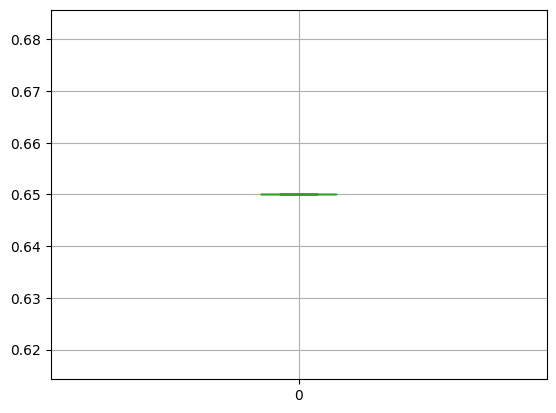

In [84]:
accAD2 = list()

for k in range(n_for):
    
    modelo_AD = RandomForestClassifier()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD2.append(tmp)

print('Bosque aleatorio con hiperpárametros modificados\n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD2).boxplot()
plt.show()

DESCRIPCION DEL ALGORITMO Y SUPOSICIONES

este modelo es una tecnica de ensamblaje de modelos que combina varios arboles de decision para mejorar la precision y prevenir el subreajuste.Con esto se puede manejar una gran cantidad de datos y predecir resultados con alta precision
Suponemos es un buen algoritmo para separar los distintos tipos de migrañas que hay en este conjunto de datos

VALIDACION CRUZADA CON RANDOM FOREST

In [71]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [72]:
grid = {
    'n_estimators' : [200,300,400,500],
    'max_features' : ['sqrt','log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini','entropy'],
    'random_state' : [10]
}

In [73]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=5)
rf_cv.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [10]})

EXPLICACION DE PORQUE ES IMPORTANTE LA VALIDACION CRUZADA

Utilizar la validacion cruzada es importante porque nos permite encontrar los mejores parametros para entrenar nuestros modelos

AJUSTE DE LOS HIPERPARAMETROS

In [74]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 10}

In [80]:
#Entrenamiento con los mejores hiperparametros
rf2 = RandomForestClassifier(n_estimators=200,
                             max_depth=4,
                             max_features='sqrt',
                             random_state=10,
                             criterion='gini').fit(X_train,np.ravel(y_train))

EXPLICACION DE LOS HIPERPARAMETROS QUE SE AJUSTARON

n_estimators: es el numero de arboles que se crean para el modelo


max_depth: es la profundidad maxima de cada arbol de decision del modelo


max_features: es el numero maximo de caracteristicas que se utilizan para crear cada arbol de decision


random_state: es el estado aleatorio que se utiliza para inicializar el generador de numeros aleatorios


criterion: es la función de calidad utilizada por el algoritmo para medir la calidad de una divison de datos

INFORME DE LOS MEJORES HIPERPARAMETROS


los mejores parametros para este caso fueron los siguientes:

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 10}



In [85]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.65,0.65
1,0.65,0.65
2,0.65,0.65
3,0.65,0.65
4,0.65,0.65
5,0.65,0.65
6,0.65,0.65
7,0.65,0.65
8,0.65,0.65
9,0.65,0.65


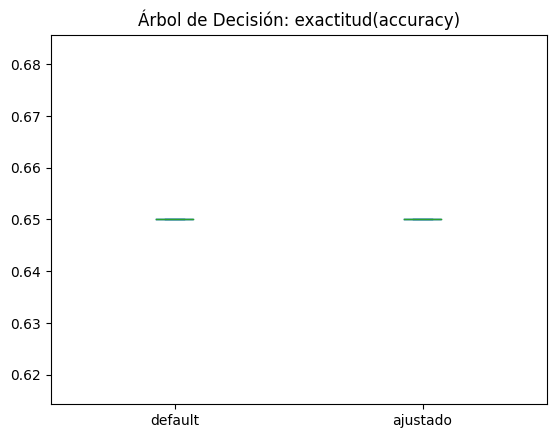

In [86]:
ddff.plot(kind='box')
plt.title('Árbol de Decisión: exactitud(accuracy)')
plt.show()

En este caso lo que podemos observar es que los modelos base y ajustado presentan los mismos resultados sin modificacion lo cual nos lleva a la conclusion de que no mejora ni empeora el rendimiento entre modelos